# Risk premium forecast by the liquidity factors

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

Load liquidity factors

In [2]:
df_liq_factors = pd.read_csv('liquidity_factor.csv', index_col='date')

df_liq_factors.index = pd.PeriodIndex(df_liq_factors.index, freq='M')

Combine with excess returns and risk premium factors

In [3]:
df_risk_premiums = pd.read_stata('/Users/dioscuroi/OneDrive - UNSW/Research Data/Bonds/Bond Yields from CRSP/risk_premium_factors.dta')
df_bond_excess_returns = pd.read_stata('/Users/dioscuroi/OneDrive - UNSW/Research Data/Bonds/Bond Yields from FRB/excess_returns.dta')
df_stock_excess_returns = pd.read_stata('/Users/dioscuroi/OneDrive - UNSW/Research Data/Stocks/Fama_French/ff3factors_monthly.dta')

In [4]:
del df_bond_excess_returns['rf1m']
df_bond_excess_returns = df_bond_excess_returns.loc[:, 'date':'exret_annual15']

df_combined = pd.merge(left=df_risk_premiums[['date', 'tent']], right=df_bond_excess_returns, on='date', how='outer')
df_combined = df_combined.merge(right=df_stock_excess_returns[['date','mktrf']], on='date', how='left')

df_combined.index = pd.PeriodIndex(df_combined['date'], freq='M')

del df_combined['date']

df_combined = df_liq_factors.join(df_combined)

df_combined[100:105]

,liq_sven,liq_resid1,liq_resid2,tent,exret_annual2,exret_annual3,exret_annual4,exret_annual5,exret_annual6,exret_annual7,exret_annual8,exret_annual9,exret_annual10,exret_annual11,exret_annual12,exret_annual13,exret_annual14,exret_annual15,mktrf
date,,,,,,,,,,,,,,,,,,,
1962-05,0.103071,0.090635,NaN,0.006942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.65
1962-06,-0.064798,0.231021,NaN,0.004112,0.005838,0.009699,0.010613,0.010065,0.008947,0.007629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-8.47
1962-07,0.011156,-0.127979,NaN,0.000387,0.005356,0.009198,0.011632,0.013073,0.013900,0.014375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.28
1962-08,-0.192420,0.103986,NaN,0.003427,0.008080,0.016225,0.020909,0.022925,0.023407,0.023103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.13
1962-09,-0.075495,0.085151,NaN,0.002511,0.008287,0.014900,0.017662,0.017718,0.016270,0.014065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-5.22


## Simple OLS regression of bond market excess returns on each liquidity factor

Predict excess returns using the liquidity factor

In [5]:
exog = sm.add_constant(df_combined.loc[:, 'liq_sven':'tent'])

In [6]:
ols = sm.OLS(df_combined['exret_annual5'].shift(-12), exog[['const','tent','liq_resid1']], missing='drop')

print(ols.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          exret_annual5   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     98.73
Date:                Sat, 04 Nov 2017   Prob (F-statistic):           3.28e-38
Time:                        21:58:32   Log-Likelihood:                 1138.2
No. Observations:                 659   AIC:                            -2270.
Df Residuals:                     656   BIC:                            -2257.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0023      0.002     -1.118      0.2

In [7]:
ols = sm.OLS(df_combined['exret_annual5'].shift(-12), exog[['const','tent','liq_resid2']], missing='drop')

print(ols.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          exret_annual5   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     79.62
Date:                Sat, 04 Nov 2017   Prob (F-statistic):           2.92e-31
Time:                        21:58:32   Log-Likelihood:                 969.42
No. Observations:                 580   AIC:                            -1933.
Df Residuals:                     577   BIC:                            -1920.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0017      0.002     -0.706      0.4

In [8]:
ols = sm.OLS(df_combined['exret_annual5'].shift(-12), exog[['const','tent','liq_sven']], missing='drop')

print(ols.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          exret_annual5   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     96.06
Date:                Sat, 04 Nov 2017   Prob (F-statistic):           2.57e-37
Time:                        21:58:32   Log-Likelihood:                 1136.1
No. Observations:                 659   AIC:                            -2266.
Df Residuals:                     656   BIC:                            -2253.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0028      0.002     -1.127      0.2

## Simple OLS regression of stock market excess returns on each liquidity factor

Predict excess returns using the liquidity factor

In [9]:
exog = sm.add_constant(df_combined.loc[:, 'liq_sven':'tent'])

In [10]:
ols = sm.OLS(df_combined['mktrf'].shift(-11), exog[['const','tent','liq_resid1']], missing='drop')

print(ols.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  mktrf   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.993
Date:                Sat, 04 Nov 2017   Prob (F-statistic):             0.0507
Time:                        21:58:32   Log-Likelihood:                -2154.7
No. Observations:                 749   AIC:                             4315.
Df Residuals:                     746   BIC:                             4329.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3212      0.186      1.726      0.0

In [11]:
ols = sm.OLS(df_combined['mktrf'].shift(-1), exog[['const','tent','liq_resid2']], missing='drop')

print(ols.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  mktrf   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4797
Date:                Sat, 04 Nov 2017   Prob (F-statistic):              0.619
Time:                        21:58:32   Log-Likelihood:                -1723.0
No. Observations:                 588   AIC:                             3452.
Df Residuals:                     585   BIC:                             3465.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3782      0.232      1.629      0.1

In [12]:
ols = sm.OLS(df_combined['mktrf'].shift(-1), exog[['const','tent','liq_sven']], missing='drop')

print(ols.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  mktrf   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.7535
Date:                Sat, 04 Nov 2017   Prob (F-statistic):              0.471
Time:                        21:58:32   Log-Likelihood:                -1937.6
No. Observations:                 667   AIC:                             3881.
Df Residuals:                     664   BIC:                             3895.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5603      0.254      2.206      0.0

## Predict excess returns with Markov switch model

### Liquidity factor as residual 1

                        Markov Switching Model Results                        
Dep. Variable:          exret_annual5   No. Observations:                  659
Model:               MarkovRegression   Log Likelihood                1350.859
Date:                Sat, 04 Nov 2017   AIC                          -2681.717
Time:                        21:58:33   BIC                          -2636.810
Sample:                    06-30-1961   HQIC                         -2664.310
                         - 04-30-2016                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0371      0.002    -15.265      0.000      -0.042      -0.032
x1             0.8869      0.132      6.703      0.0

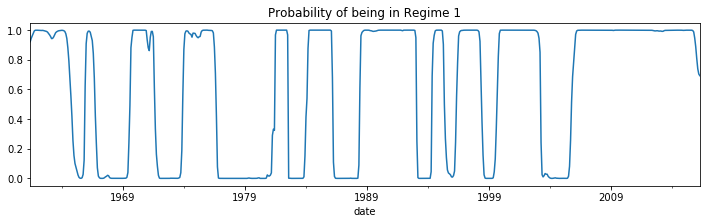

In [13]:
regime_model_bond = sm.tsa.MarkovRegression(
    df_combined['exret_annual5'].shift(-12), k_regimes=2, exog=exog[['tent', 'liq_resid1']],
    missing='drop', switching_variance=True)

regime_results_bond = regime_model_bond.fit()

print(regime_results_bond.summary())

regime_results_bond.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in Regime 1', figsize=(12,3));

/Users/dioscuroi/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                        Markov Switching Model Results                        
Dep. Variable:                  mktrf   No. Observations:                  756
Model:               MarkovRegression   Log Likelihood               -2136.117
Date:                Sat, 04 Nov 2017   AIC                           4292.235
Time:                        21:58:34   BIC                           4338.515
Sample:                    01-31-1954   HQIC                          4310.061
                         - 12-31-2016                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1070      0.214      5.169      0.000       0.687       1.527
x1             1.7327     11.720      0.148      0.8

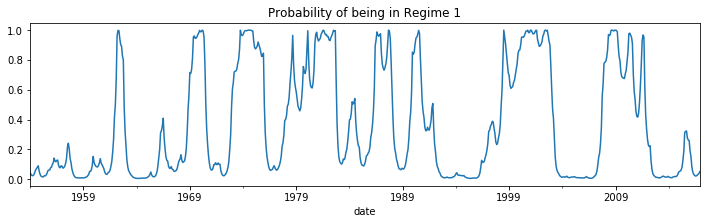

In [14]:
regime_model_stock = sm.tsa.MarkovRegression(
    df_combined['mktrf'].shift(-1), k_regimes=2, exog=exog[['tent', 'liq_resid1']],
    missing='drop', switching_variance=True)

regime_results_stock = regime_model_stock.fit()

print(regime_results_stock.summary())

regime_results_stock.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in Regime 1', figsize=(12,3));

In [15]:
p_bond = regime_results_bond.smoothed_marginal_probabilities[1].rename('p_bond')
p_stock = regime_results_stock.smoothed_marginal_probabilities[0].rename('p_stock')

combined_prob = pd.DataFrame(p_bond)
combined_prob = combined_prob.join(p_stock)

combined_prob.corr()

,p_bond,p_stock
p_bond,1.00000,-0.11312
p_stock,-0.11312,1.00000


### Liquidity factor as residual 2

                        Markov Switching Model Results                        
Dep. Variable:          exret_annual5   No. Observations:                  580
Model:               MarkovRegression   Log Likelihood                1176.103
Date:                Sat, 04 Nov 2017   AIC                          -2332.206
Time:                        21:58:34   BIC                          -2288.576
Sample:                    01-31-1968   HQIC                         -2315.196
                         - 04-30-2016                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0398      0.003    -14.750      0.000      -0.045      -0.034
x1             1.0230      0.140      7.326      0.0

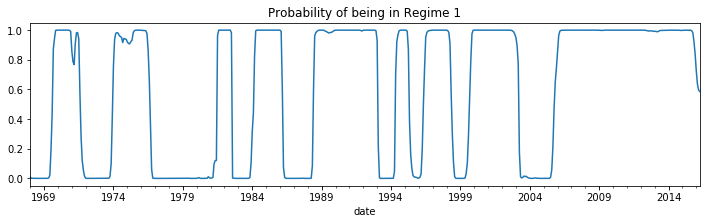

In [16]:
regime_model_bond = sm.tsa.MarkovRegression(
    df_combined['exret_annual5'].shift(-12), k_regimes=2, exog=exog[['tent', 'liq_resid2']],
    missing='drop', switching_variance=True)

regime_results_bond = regime_model_bond.fit()

print(regime_results_bond.summary())

regime_results_bond.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in Regime 1', figsize=(12,3));

                        Markov Switching Model Results                        
Dep. Variable:                  mktrf   No. Observations:                  588
Model:               MarkovRegression   Log Likelihood               -1691.880
Date:                Sat, 04 Nov 2017   AIC                           3403.759
Time:                        21:58:36   BIC                           3447.527
Sample:                    01-31-1968   HQIC                          3420.812
                         - 12-31-2016                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2327      0.286      4.313      0.000       0.673       1.793
x1           -12.3973     14.477     -0.856      0.3

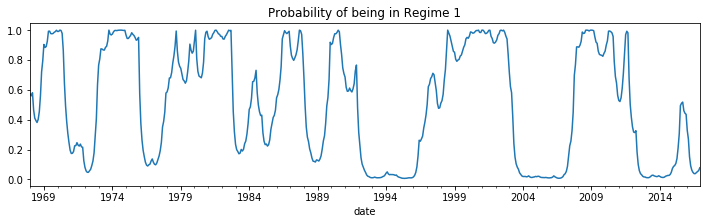

In [17]:
regime_model_stock = sm.tsa.MarkovRegression(
    df_combined['mktrf'].shift(-1), k_regimes=2, exog=exog[['tent', 'liq_resid2']],
    missing='drop', switching_variance=True)

regime_results_stock = regime_model_stock.fit()

print(regime_results_stock.summary())

regime_results_stock.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in Regime 1', figsize=(12,3));

In [18]:
p_bond = regime_results_bond.smoothed_marginal_probabilities[1].rename('p_bond')
p_stock = regime_results_stock.smoothed_marginal_probabilities[0].rename('p_stock')

combined_prob = pd.DataFrame(p_bond)
combined_prob = combined_prob.join(p_stock)

combined_prob.corr()

,p_bond,p_stock
p_bond,1.000000,-0.088692
p_stock,-0.088692,1.000000


### Liquidity factor as Svensson deviation

                        Markov Switching Model Results                        
Dep. Variable:          exret_annual5   No. Observations:                  659
Model:               MarkovRegression   Log Likelihood                1357.531
Date:                Sat, 04 Nov 2017   AIC                          -2695.062
Time:                        21:58:36   BIC                          -2650.155
Sample:                    06-30-1961   HQIC                         -2677.655
                         - 04-30-2016                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0317      0.003    -10.247      0.000      -0.038      -0.026
x1             0.8545      0.133      6.422      0.0

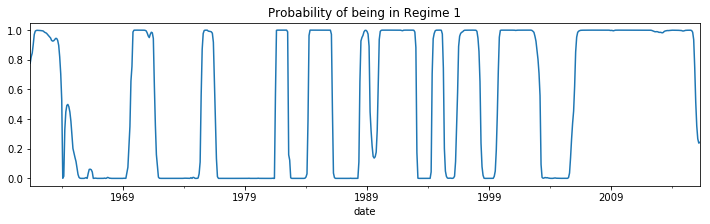

In [19]:
regime_model_bond = sm.tsa.MarkovRegression(
    df_combined['exret_annual5'].shift(-12), k_regimes=2, exog=exog[['tent', 'liq_sven']],
    missing='drop', switching_variance=True)

regime_results_bond = regime_model_bond.fit()

print(regime_results_bond.summary())

regime_results_bond.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in Regime 1', figsize=(12,3));

                        Markov Switching Model Results                        
Dep. Variable:                  mktrf   No. Observations:                  667
Model:               MarkovRegression   Log Likelihood               -1900.194
Date:                Sat, 04 Nov 2017   AIC                           3820.388
Time:                        21:58:37   BIC                           3865.415
Sample:                    06-30-1961   HQIC                          3837.832
                         - 12-31-2016                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2571      0.306      4.112      0.000       0.658       1.856
x1           -17.6888     13.542     -1.306      0.1

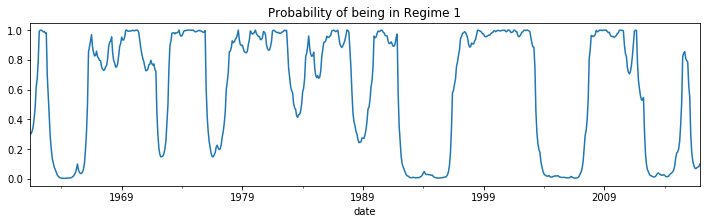

In [20]:
regime_model_stock = sm.tsa.MarkovRegression(
    df_combined['mktrf'].shift(-1), k_regimes=2, exog=exog[['tent', 'liq_sven']],
    missing='drop', switching_variance=True)

regime_results_stock = regime_model_stock.fit()

print(regime_results_stock.summary())

regime_results_stock.smoothed_marginal_probabilities[1].plot(
    title='Probability of being in Regime 1', figsize=(12,3));

In [21]:
p_bond = regime_results_bond.smoothed_marginal_probabilities[1].rename('p_bond')
p_stock = regime_results_stock.smoothed_marginal_probabilities[0].rename('p_stock')

combined_prob = pd.DataFrame(p_bond)
combined_prob = combined_prob.join(p_stock)

combined_prob.corr()

,p_bond,p_stock
p_bond,1.000000,-0.062933
p_stock,-0.062933,1.000000
